In [18]:
import mne
import pandas as pd
from connection_complexity.data.raw_data.EDF.edf_helpers import read_edf
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [26]:
# read .mat
import scipy.io
mat = scipy.io.loadmat("/media/dan/Data/data/connectivity/thresholded_mats/additional_calcs/julia_thresholded_mats/pdist_cosine/pdist_cosine~001~000001~threshadj~highest~6102.mat")
mat = mat['measure']
mat.shape


(118, 118)

In [13]:
with h5py.File("/media/dan/Data/outputs/ubiquitous-spork/pyspi_combined_patient_hdf5s/001_20250414.h5", 'r') as f:
    test = f['metadata/adjacency_matrices']['pdist_cosine'][()]
    soz = f['metadata/patient_info/soz'][()]
    ilae = f['metadata/patient_info/ilae'][()]
test = test[:,:,1]


In [14]:
test.shape

(118, 118)

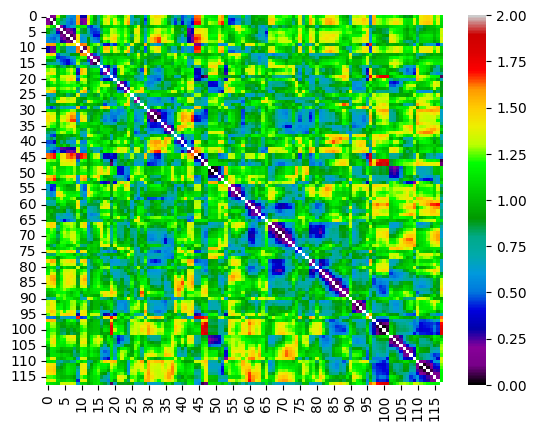

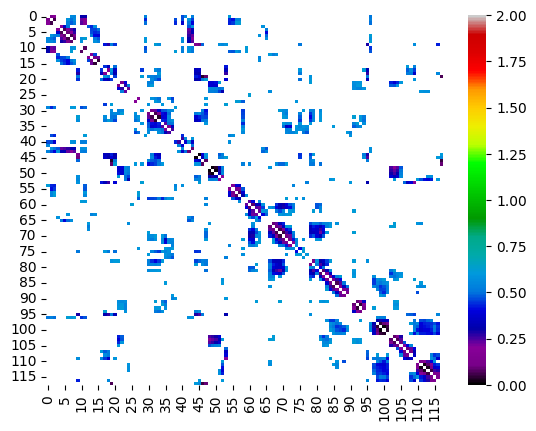

In [28]:
import seaborn as sns
sns.heatmap(test, vmin=0, vmax=2, cmap="nipy_spectral")
plt.savefig("not_thresheld.png", dpi=300)

plt.figure()
sns.heatmap(mat, vmin=0, vmax=2, cmap="nipy_spectral")
plt.savefig("thresheld.png", dpi=300)


In [5]:
raw = read_edf("/media/dan/Data/data/baseline_patients/baseline_edfs/014_Baseline.EDF")

In [ ]:
df = pd.read_csv("/media/dan/Data/data/FULL_composite_patient_info.csv")
df = df[df["pid"] == 14]
df = df[["electrode","soz"]]

In [16]:
soz = df[df["soz"] == 1]["electrode"].sample(2).values
non = df[df["soz"] == 0]["electrode"].sample(3).values

In [31]:
lst = soz.tolist() + non.tolist()

# shuffle the list
lst = np.random.permutation(lst)


In [33]:
chunk = raw.pick_channels(lst)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [34]:
data = chunk.get_data()

# reorder the rows flip row 0 and 3
tmp = data[0, :].copy()

In [35]:
sampling_rate = chunk.info["sfreq"]

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate number of samples for 10 seconds
n_samples = int(5 * sampling_rate)

# Generate random start point
start_idx = np.random.randint(0, data.shape[1] - n_samples)
start_idx = int(91047 + (2*sampling_rate))
end_idx = start_idx + n_samples

print(start_idx, end_idx)

# Create time array for x-axis
time = np.linspace(0, 5, n_samples)

# Create figure with subplots
fig, axes = plt.subplots(data.shape[0], 1, figsize=(15, 10), sharex=True)

# Plot each channel
for i, (ax, channel_data) in enumerate(zip(axes, data)):
    # Determine color based on whether it's SOZ or non-SOZ
    color = 'red' if chunk.ch_names[i] in soz else 'black'
    
    # Plot the data
    ax.plot(time, channel_data[start_idx:end_idx], color=color)
    ax.set_ylabel("Voltage")
    ax.grid(True)

# Set common x-axis label
axes[-1].set_xlabel('Time (seconds)')

# Adjust layout and show plot
plt.tight_layout()

plt.savefig("raw_example_colored.png", dpi=300)

95143 105383


In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate number of samples for 10 seconds
n_samples = int(5 * sampling_rate)

# Generate random start point
start_idx = np.random.randint(0, data.shape[1] - n_samples)
start_idx = int(91047 + (2*sampling_rate))
end_idx = start_idx + n_samples

print(start_idx, end_idx)

# Create time array for x-axis
time = np.linspace(0, 5, n_samples)

# Create figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

# Plot each channel
for i, (ax, channel_data) in enumerate(zip(axes, data)):
    # Determine color based on whether it's SOZ or non-SOZ
    # color = 'red' if chunk.ch_names[i] in soz else 'black'
    color = 'black'
    
    # Plot the data
    ax.plot(time, channel_data[start_idx:end_idx], color=color)
    ax.set_ylabel("Voltage")
    ax.grid(True)

    if i > 3:
        break

# Set common x-axis label
axes[-1].set_xlabel('Time (seconds)')

# Adjust layout and show plot
plt.tight_layout()

plt.savefig("raw_example_3.png", dpi=300)

95143 105383
